In [2]:
what_we_are_covering = {1: "data (prepare and load)",
                        2: "build model",
                        3: "fitting the modelto data (training)",
                        4: "making predictions and evaluating a model (inference)",
                        5: "saving and loading a model",
                        6: "putting it all together"}
what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the modelto data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch 
from torch import nn # basic building blocks 

import matplotlib.pyplot as plt

torch.__version__

'2.3.0'

# Data (prepare and load)

In [16]:
# using linear regression formula 

# create *known* paramters 
weight = 0.7 
bias = 0.3 

# create 
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
X.shape , X[:10]

(torch.Size([50, 1]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]))

In [21]:
y = weight * X + bias
y.shape, y[:10]

(torch.Size([50, 1]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Splitting data into train and test

In [22]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## visualise

In [35]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
    Plot training data, test data and compares predictions
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=10, label="Training data")

    # Plot test data in green
    plt.scatter(train_data, train_labels, c="g", s=10, label="Testing data")

    # Are there predictions?
    if predictions is not None: 
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=10, label="Predictions")

    plt.legend(prop={"size":14})

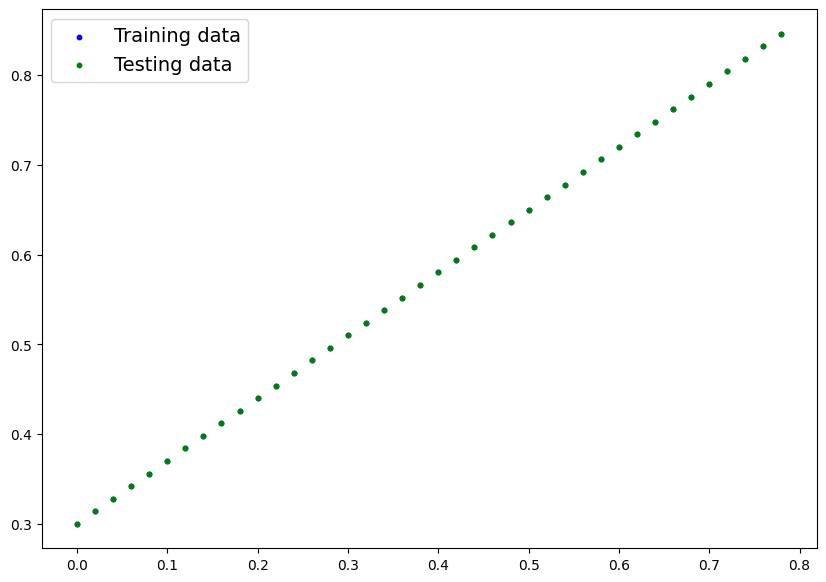

In [36]:
plot_prediction()

# build model

<!-- torch.rand() draws from a uniform distribution over the interval [0, 1).

torch.randn() draws from a standard normal distribution (Gaussian distribution) with a mean of 0 and a standard deviation of 1.  -->

In [37]:
from torch import nn

# create linear regression model class
class LinearRegressionModel(nn.Module): # <-- almost everything from Pytorch inherits from nn.Module 
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # linear regression formula


two main algos : 
1. gradient descent 
2. backpropagation

### Pytorch building essentails 
* torch.nn - contains all the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural network module, if you subclass it , you should overwrite forward().
* torch.optim - this is where the optimizers in Pytorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), defines what happen in computation

## checking content of our model using .parameters()

In [40]:
## random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [41]:
# List named paramters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [42]:
weight, bias

(0.7, 0.3)

## Making prediction using 'torch.inference_mode()

In [ ]:
# Making prediction using 'torch.inference_mode()'
with torch.inference_mode(): # or torch.nograd():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

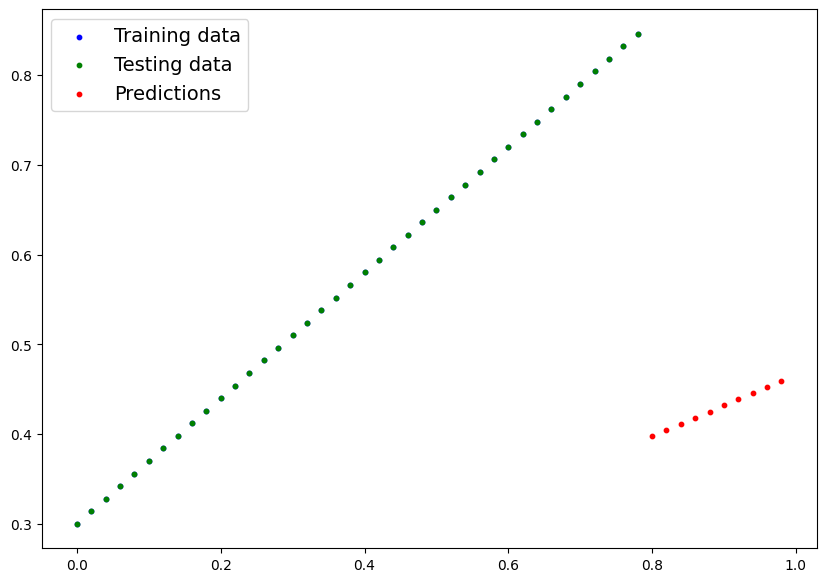

In [44]:
plot_prediction(predictions=y_preds)

## Train model

loss function - tells how wrong your prediction is to the ideal output
loss/cost/objective/criterion fucntion


### Things we need:
1. loss function 
2. optimizers - takes in account the loss of a model and adjusts models parameters to improve the loss function 
  - You need to set 2 params in optimizer 'params' and 'lr'
3. training loop
4. testing loop

In [45]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [49]:
# L1loss is mean absolute error 
# Setup loss function 
loss_fn = nn.L1Loss()

# Setup a optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr= 0.01)

## training and testing loop

training loop: 

0. loop through data
1. forward pass 
2. calculate loss (compare forward pass prediciton to ground truth)
3. optimizer zero grad 
4. loss backward - move backward through the network to calculate the gradients of each of the parameters of our model wrt the loss (backpropagation) 
5. optimizer step - use optimizer to adjust the models paramters to improve the loss (gradient descent)

In [ ]:
epochs = 10 # hyper-parameters

### TRAINING
# 0. Loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in pytorch set all parameters that require_gradient=True 

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss: 1st param(input), 2nd param(target)
    loss = loss_fn(y_pred,y_train)
    print(f"Train Loss: {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss wrt the params of model
    loss.backward()

    # 5. Performs gradient descent
    optimizer.step() # By default how the optimizer changes will acculumate through the loop so.. we have to zero them in step 3

    print(f"Model Params {model_0.state_dict()}")
    print()

    ### TESTING
    model_0.eval() # turns off different settings in the model note needed for eval/testing (dropout/batch norm layers)


Train Loss: 0.23223432898521423
Model Params OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])

Train Loss: 0.22071333229541779
Model Params OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])

Train Loss: 0.20919232070446014
Model Params OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])

Train Loss: 0.1976713240146637
Model Params OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])

Train Loss: 0.18615034222602844
Model Params OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])

Train Loss: 0.1746293306350708
Model Params OrderedDict([('weights', tensor([0.3874])), ('bias', tensor([0.2588]))])

Train Loss: 0.16310831904411316
Model Params OrderedDict([('weights', tensor([0.3913])), ('bias', tensor([0.2688]))])

Train Loss: 0.1515873372554779
Model Params OrderedDict([('weights', tensor([0.3952])), ('bias', tensor([0.2788]))])

Train Loss: 0.14006634056568146
Model Params Ordere

In [58]:
# Making prediction using 'torch.inference_mode()' after training
with torch.inference_mode():  
    y_preds = model_0(X_test)

y_preds

tensor([[0.6212],
        [0.6293],
        [0.6373],
        [0.6454],
        [0.6534],
        [0.6615],
        [0.6696],
        [0.6776],
        [0.6857],
        [0.6937]])

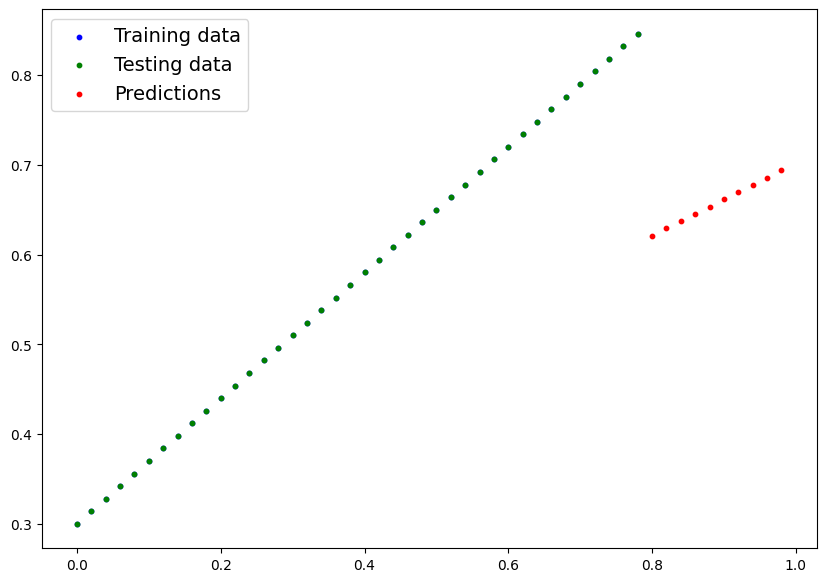

In [59]:
plot_prediction(predictions=y_preds)

In [60]:
epochs = 100  # hyper-parameters

### TRAINING
# 0. Loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train()  # train mode in pytorch set all parameters that require_gradient=True

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss: 1st param(input), 2nd param(target)
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss wrt the params of model
    loss.backward()

    # 5. Performs gradient descent
    optimizer.step()  # By default how the optimizer changes will acculumate through the loop so.. we have to zero them in step 3

    ### TESTING
    model_0.eval()  # turns off different settings in the model note needed for eval/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking & couple of more things behind
        # 1. Do forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred,y_test)

    print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")
    if epoch % 10 == 0: 
        print(f"Model Params {model_0.state_dict()}")

Epoch: 0 | Train Loss: 0.11702437698841095 | Test Loss: 0.2520582973957062
Model Params OrderedDict([('weights', tensor([0.4069])), ('bias', tensor([0.3088]))])
Epoch: 1 | Train Loss: 0.1060912236571312 | Test Loss: 0.2395961582660675
Epoch: 2 | Train Loss: 0.09681282937526703 | Test Loss: 0.22817862033843994
Epoch: 3 | Train Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 4 | Train Loss: 0.08227583020925522 | Test Loss: 0.2069590985774994
Epoch: 5 | Train Loss: 0.07638873159885406 | Test Loss: 0.19773726165294647
Epoch: 6 | Train Loss: 0.07160007208585739 | Test Loss: 0.1890866756439209
Epoch: 7 | Train Loss: 0.06747636198997498 | Test Loss: 0.18101617693901062
Epoch: 8 | Train Loss: 0.06395438313484192 | Test Loss: 0.17353470623493195
Epoch: 9 | Train Loss: 0.06097004562616348 | Test Loss: 0.16665108501911163
Epoch: 10 | Train Loss: 0.05845819041132927 | Test Loss: 0.16037428379058838
Model Params OrderedDict([('weights', tensor([0.4425])), ('bias', tensor([0.3688])

In [64]:
# Making prediction using 'torch.inference_mode()' after training
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8247],
        [0.8368],
        [0.8490],
        [0.8611],
        [0.8733],
        [0.8854],
        [0.8976],
        [0.9097],
        [0.9219],
        [0.9340]])

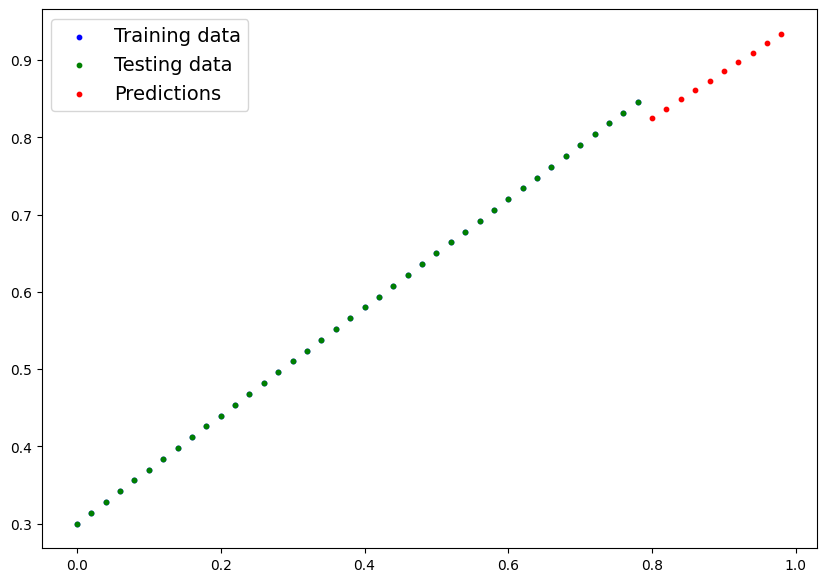

In [65]:
plot_prediction(predictions=y_preds)

In [66]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6074])), ('bias', tensor([0.3388]))])

In [67]:
weight, bias

(0.7, 0.3)

# Redo

In [73]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

# L1loss is mean absolute error
# Setup loss function
loss_fn = nn.L1Loss()

# Setup a optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [74]:
epochs = 200  # hyper-parameters

# Tracking valies
epoch_count = []
loss_value = []
test_loss_value = []


### TRAINING
# 0. Loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train()  # train mode in pytorch set all parameters that require_gradient=True

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss: 1st param(input), 2nd param(target)
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss wrt the params of model
    loss.backward()

    # 5. Performs gradient descent
    optimizer.step()  # By default how the optimizer changes will acculumate through the loop so.. we have to zero them in step 3

    ### TESTING
    model_0.eval()  # turns off different settings in the model note needed for eval/testing (dropout/batch norm layers)
    with torch.inference_mode():  # turns off gradient tracking & couple of more things behind
        # 1. Do forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_value.append(loss)
        test_loss_value.append(test_loss)
        print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")
        print(f"Model Params {model_0.state_dict()}")

Epoch: 0 | Train Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Model Params OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Train Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Model Params OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Train Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Model Params OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Train Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Model Params OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Train Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Model Params OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Train Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Model Params OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Train Loss: 

In [75]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [76]:
# Making prediction using 'torch.inference_mode()' after training
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

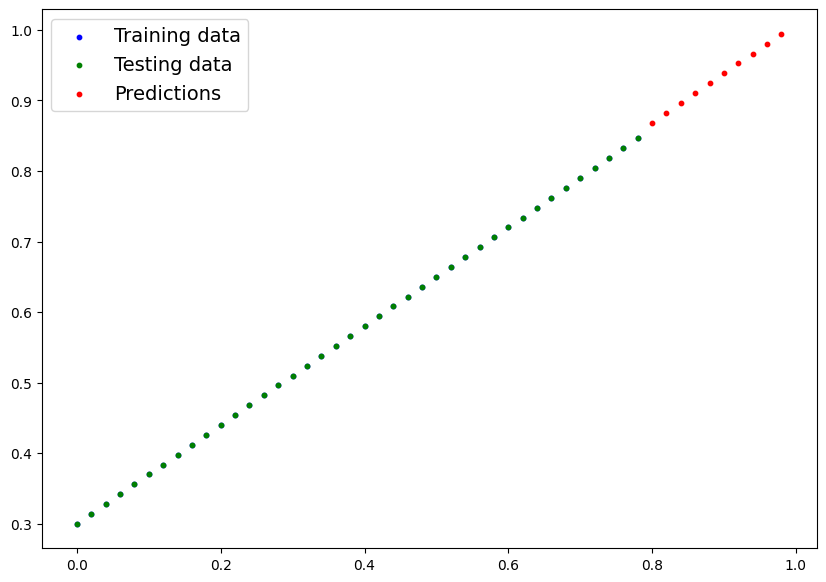

In [77]:
plot_prediction(predictions=y_preds)

In [81]:
epoch_count[:10], loss_value[:10] , test_loss_value[:10]

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647)])

In [83]:
import numpy as np

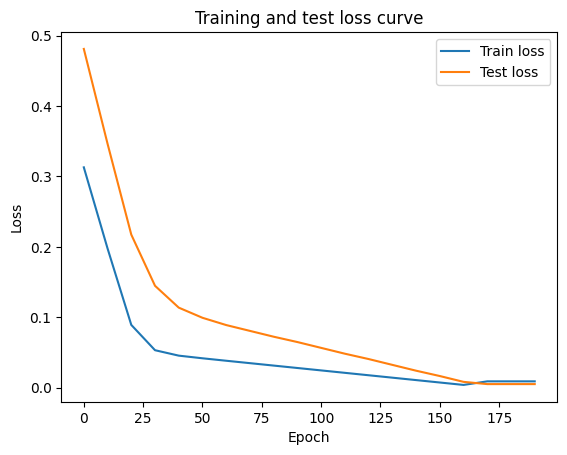

In [85]:
# Plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_value).numpy()), label="Train loss") # it has grad attached
plt.plot(epoch_count, test_loss_value, label="Test loss")

plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

## Saving a model in pytorch

3 main methods for saving and loading 

1. torch.save() - allows you to save a pytorch object in pythons pickle format
2. torch.load() - allows you to load a saved pytorch object
3. torch.nn.Module.load_state_dict() - this allows to load a models's saved state dictionary

In [86]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [89]:
# saving pytorch model
from pathlib import Path

# 1. create models dictionary
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [96]:
# 3. saving model state dict
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [97]:
!ls -l models

total 8
-rw-r--r--  1 irtiza  staff  1680 Dec 29 01:19 01_pytorch_workflow_model_0.pth


In [98]:
# loading pytorch model 
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [99]:
model_0.state_dict  # hence always pass state_dict() not state_dict

<bound method Module.state_dict of LinearRegressionModel()>

In [100]:
# to load in a saved dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# load the saved state dict (this will update new instance with updated saved model)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [101]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

# better

instad of initialising parameter ourself by nn.Parameter we can use default layers that have parameters in build

Applies an affine linear transformation to the incoming data: y = Ax + b

In [ ]:
from torch import nn

# create linear regression model class
class LinearRegressionModelV2(
    nn.Module
):  # <-- almost everything from Pytorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating model parameters
        self.linear_layer = nn.Linear(
            torch.randn(in_features=1, out_features=1)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:  # <- "x" is the input data
        return self.linear_layer(x)